<a href='https://www.kaggle.com/c/titanic'> <img src='header.png' /></a>

___
# Titanic

This notebook is made in order to participate in the competition made by Kaggle [Titanic from Kaggle](https://www.kaggle.com/c/titanic). 

The competition consist in predict a classification- survival or deceased.

This notebook shows my solution for this challenge

___
## Import Libraries


In [1]:
# Library for data structures and data analysis
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# Fundamental packages for scientific computing with Python
import numpy as np

# Dataviz libraries
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import seaborn as sns
%matplotlib inline

___
# The Data

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The training set should be used to build the machine learning models.

The test set should be used to predict the survival  for each passenger.

## Exploratory Data Analysis

In this subsection shows an analysis of the given data

In [2]:
# load the train data
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


___
### Data Dictionary

Target variable:
- Survived: . 0 = No, 1 = Yes

The other variables:
- PassengerId: and id given to each traveler on the boat.
- Pclass: Ticket class	
        1 = 1st Upper
        2 = 2nd Middle 
        3 = 3rd Lower
- Name
- Sex
- Age: The age on years (fractional if less than 1)
- SibSp: # of siblings / spouses aboard 
        The dataset defines family relations in this way:
        Sibling = brother, sister, stepbrother, stepsister
        Spouse = husband, wife (mistresses and fiancés were ignored)
- Parch: # of parents / children aboard
        The dataset defines family relations in this way:
        Parent = mother, father
        Child = daughter, son, stepdaughter, stepson
        Some children travelled only with a nanny, therefore parch=0 for them.
- Ticket
- Fare: Passenger fare	
- Cabin: The cabin number 
- Embarked:	Port of Embarkation	
        C = Cherbourg
        Q = Queenstown
        S = Southampton

In [4]:
# Statistical description of the data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The folowing plot shows where there are missing data

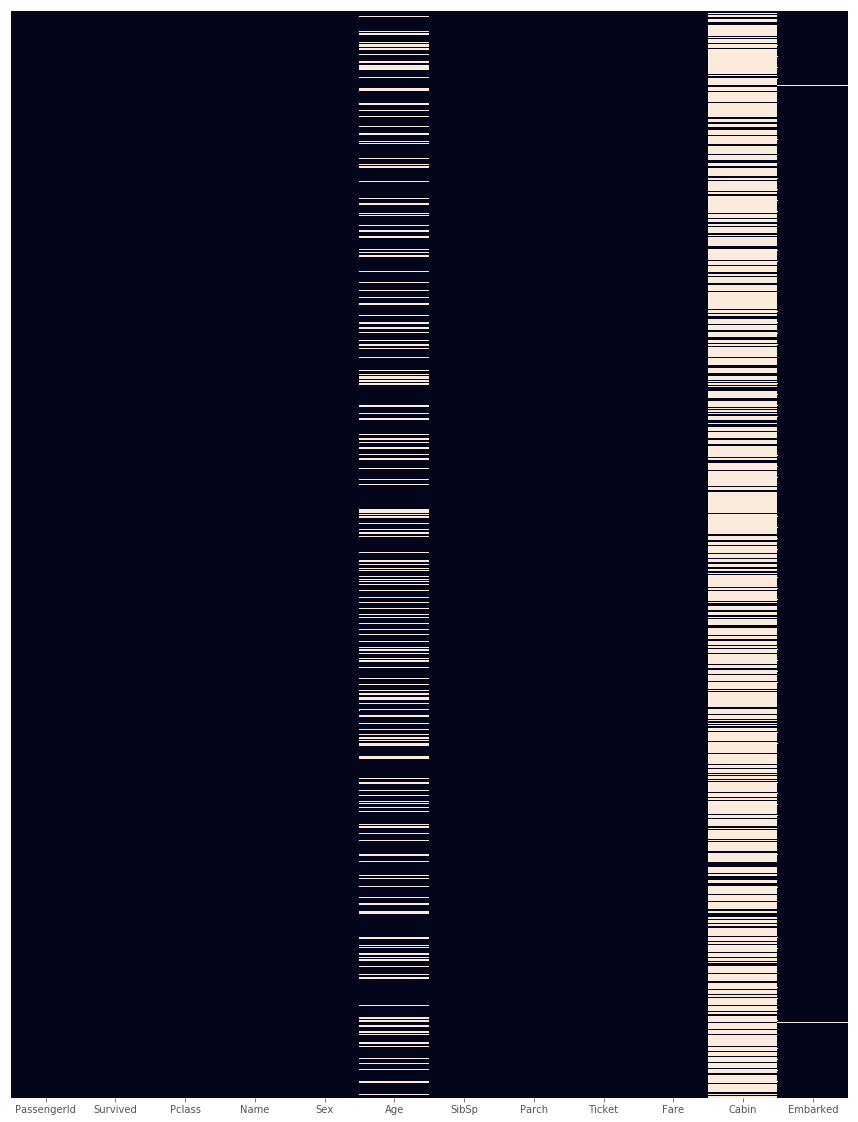

In [5]:
plt.figure(figsize=(15, 20))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

Roughly 15 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. Also there are some embarked data missing.

Comparison between the quantity of survivors and not survivors

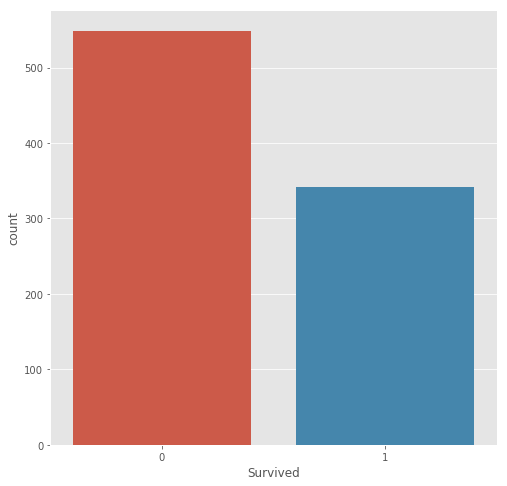

In [6]:
plt.figure( figsize=(8,8))
sns.countplot(x='Survived',data=train)

There are enough data for each survivor or deceased in order to make a classifier. (The survivor data is not skewed) 

Passanger Sex correlated with the survival

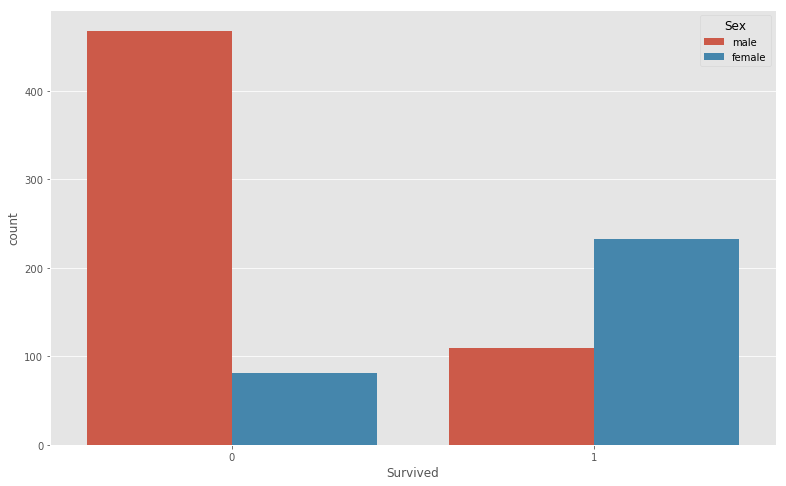

In [7]:
plt.figure( figsize=(13,8))
sns.countplot(x='Survived',hue='Sex',data=train)

The Sex variable seems to be a decisive feature. Women are more likely to survivre.

Passanger class correlated with the survival

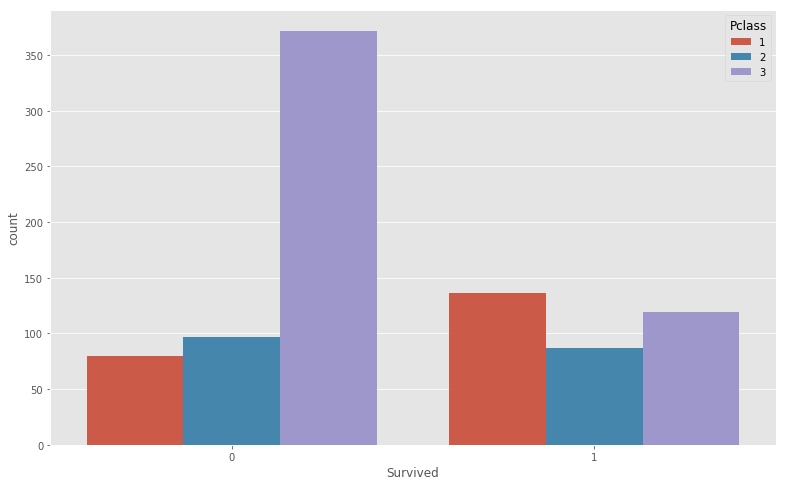

In [8]:
plt.figure( figsize=(13,8))
sns.countplot(x='Survived',hue='Pclass',data=train)

In [9]:
train.groupby('Pclass').Survived.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


As shown in the plot, and in the table, the first class has a better chance of survive that the other classes 

Distirbution of age correlated with the survival

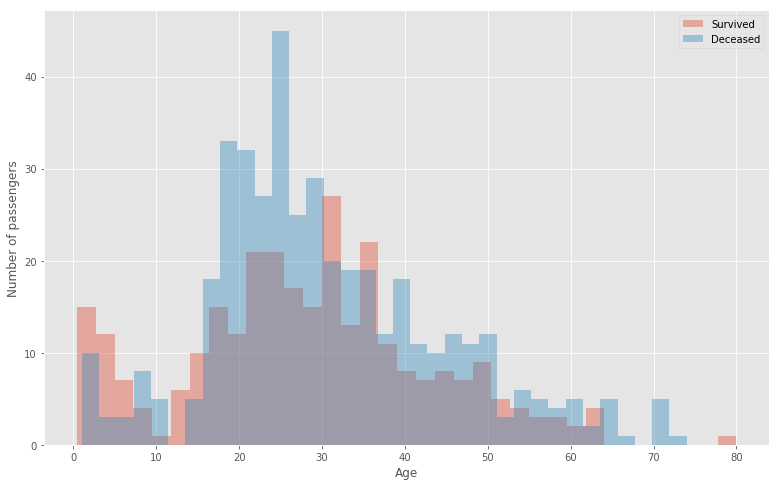

In [10]:
plt.figure( figsize=(13,8))
sns.distplot(train[train['Survived']==1]['Age'].dropna(),kde=False,bins=35,label="Survived")
sns.distplot(train[train['Survived']==0]['Age'].dropna(),kde=False,bins=35,label="Deceased")
plt.xlabel('Age')
plt.ylabel('Number of passengers')

plt.legend();

If you follow the chart bin by bin, you will notice that passengers who are less than 10 are more likely to survive.


Fare ticket correlated with the survival

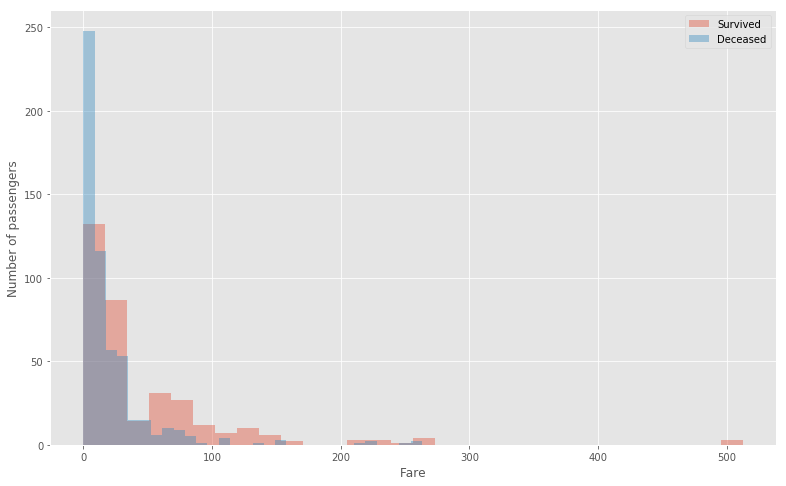

In [11]:
plt.figure( figsize=(13,8))
sns.distplot(train[train['Survived']==1]['Fare'].dropna(),kde=False,bins=30,label="Survived")
sns.distplot(train[train['Survived']==0]['Fare'].dropna(),kde=False,bins=30,label="Deceased")
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();


Passengers with cheaper ticket fares are more likely to die.

___
# Data Cleaning - Feature engineering

###  Loading the data

The training data set and the test set are combined. This is useful when there is no certanty that all the features of the test set are in the training set. Besides, combining the two sets will save the same work to do later on when testing.



In [12]:
def get_data():
    # reading train data
    train = pd.read_csv('train.csv')
    
    # reading test data
    test = pd.read_csv('test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    

    # merging train data and test data for future feature engineering
    data_all = train.append(test)
    data_all.reset_index(inplace=True)
    data_all.drop('index',inplace=True,axis=1)
    
    return data_all

In [13]:
data_all = get_data() 

See the data info

In [14]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [15]:
data_all.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Extracting the passenger titles

All the passengers name has a title. 

Extract all the unique titles

In [16]:
data_all['title'] = data_all['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
data_all.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

Count how many peapple have the titles

In [17]:
data_all.groupby(['title']).Pclass.count()

title
Capt              1
Col               4
Don               1
Dona              1
Dr                8
Jonkheer          1
Lady              1
Major             2
Master           61
Miss            260
Mlle              2
Mme               1
Mr              757
Mrs             197
Ms                2
Rev               8
Sir               1
the Countess      1
Name: Pclass, dtype: int64

Analyze the data for the titles less used

In [18]:
data_all[(data_all.title!='Master') & (data_all.title!='Miss')& (data_all.title!='Mr')& (data_all.title!='Mrs')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
30,31,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Don
149,150,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S,Rev
150,151,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,Rev
245,246,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Dr
249,250,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S,Rev
317,318,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Dr
369,370,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,Mme
398,399,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Dr
443,444,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,Ms
449,450,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,Major


A function is created in order to group the people with not very common titles

In [19]:
def get_titles():

    global data_all
    
    # we extract the title from each name
    data_all['title'] = data_all['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        'Mr':          'Mr', 
                        'Mrs':         'Mrs', 
                        'Miss':        'Miss',
                        'Master':      'Master', 
                        'Don':         'Royalty', 
                        'Rev':         'Rev', 
                        'Dr':          'Dr', 
                        'Mme':         'Mrs',
                        'Ms':          'Mrs',
                        'Major':       'Officer', 
                        'Lady':        'Royalty', 
                        'Sir':         'Royalty', 
                        'Mlle':        'Miss', 
                        'Col':         'Officer', 
                        'Capt':        'Officer', 
                        'the Countess':'Royalty',
                        'Jonkheer':    'Royalty', 
                        'Dona':        'Royalty'
                        }
    
    # we map each title
    data_all['title'] = data_all.title.map(Title_Dictionary)

This function extract the titles. Then, it maps the titles to categories of titles. The selection is based in the analysis of the previus table:

- Mr
- Mrs
- Miss
- Master
- Royalty
- Rev
- Dr
- Officer


In [20]:
get_titles()

In [21]:
data_all.groupby(['title']).Pclass.count()

title
Dr           8
Master      61
Miss       262
Mr         757
Mrs        200
Officer      7
Rev          8
Royalty      6
Name: Pclass, dtype: int64

The title class with the less people is the Royalty with 6 people

### Processing the ages

As seen in the first part that roughly the 15 percent of the Age data is missing. Simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers. 

To understand why, let's group our dataset by sex, Title and passenger class.

In [22]:
data_all.groupby(['Sex','Pclass','title']).Age.median()

Sex     Pclass  title  
female  1       Dr         49.0
                Miss       30.0
                Mrs        45.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Dr         47.0
                Master      6.0
                Mr         41.5
                Officer    53.0
                Royalty    40.0
        2       Dr         38.5
                Master      2.0
                Mr         30.0
                Rev        41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

Look at the median age column and see how this value can be different based on the Sex, Pclass and Title put together.

The folowing function fills in the missing age based on these different attributes.

In [23]:
def process_age():
    
    global data_all
    
    age_dict=data_all.groupby(['Sex','Pclass','title']).Age.median().to_dict()
    
    # a function that fills the missing values of the Age variable
    def fillAges(row):
        return age_dict[tuple(row[['Sex','Pclass','title']].values)]
    
    
    data_all.Age = data_all.apply(lambda r : fillAges(r) if np.isnan(r['Age']) else r['Age'], axis=1)

In [24]:
process_age()

In [25]:
data_all.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [26]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


### Processing the Fare
One value of fare is missing therefore is replaced by the median value as shown in the previus section.

In [27]:
data_all.groupby(['Sex','Pclass','title']).Fare.median()

Sex     Pclass  title  
female  1       Dr          25.9292
                Miss        99.9625
                Mrs         78.1125
                Royalty     86.5000
        2       Miss        20.2500
                Mrs         26.0000
        3       Miss         8.0500
                Mrs         15.5000
male    1       Dr          81.8583
                Master     134.5000
                Mr          47.1000
                Officer     30.5000
                Royalty     27.7208
        2       Dr          12.2500
                Master      26.0000
                Mr          13.0000
                Rev         13.0000
        3       Master      22.3583
                Mr           7.8958
Name: Fare, dtype: float64

In [28]:
def process_fares():
    
    global data_all
    
    fare_dict=data_all.groupby(['Sex','Pclass','title']).Fare.median().to_dict()
    
    # a function that fills the missing values of the Fare variable
    def fill_Fare(row):
        return fare_dict[tuple(row[['Sex','Pclass','title']].values)]
    
    
    data_all.Fare = data_all.apply(lambda r : fill_Fare(r) if np.isnan(r['Fare']) else r['Fare'], axis=1)
    

In [29]:
process_fares()

In [30]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


### Processing the Embarked
Two value of embarked are missing therefore as follows.

We analyze the passengers with missing data

In [31]:
data_all[data_all.Embarked.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


The ticket number is the same; therefore, they embarked in the same port. The analysis by ticket number, name or cabin does not gives a conclusive answer; therefore, they are set to the most frequent one (S)

In [32]:
data_all.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

The categorical features (Dummys)  are created.

In [33]:
def process_embarked():
    
    global data_all
    # fill the Nan with S
    data_all.Embarked.fillna('S',inplace=True)
    
    # dummy 
    # embarked_dummies = pd.get_dummies(data_all['Embarked'],prefix='Embarked')
    # data_all = pd.concat([data_all,embarked_dummies] ,axis=1)
    # data_all.drop('Embarked',axis=1,inplace=True)

In [34]:
process_embarked()

In [35]:
data_all.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [36]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


### Processing the Cabin

The 80 percent of this data is missing. The following analysis is made:
- How many types of Cabins there are
- How many the passangers of with class are located in those cabins
- The mean fare per cabin by class

In [37]:
data_all['Cabin'] = data_all['Cabin'].dropna().map(lambda c : c[0])
data_all.Cabin.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [38]:
data_all.groupby(['Cabin','Pclass']).Fare.count()

Cabin  Pclass
A      1         22
B      1         65
C      1         94
D      1         40
       2          6
E      1         34
       2          4
       3          3
F      2         13
       3          8
G      3          5
T      1          1
Name: Fare, dtype: int64

In [39]:
data_all.groupby(['Cabin','Pclass']).Fare.mean()

Cabin  Pclass
A      1          41.244314
B      1         122.383078
C      1         107.926598
D      1          58.919065
       2          13.595833
E      1          63.464706
       2          11.587500
       3          11.000000
F      2          23.423077
       3           9.395838
G      3          14.205000
T      1          35.500000
Name: Fare, dtype: float64

With this analysis, the estimation of the cabin could be done, but it is better to give the algorithm to estimate the survival make the decisions. Therefore, the people without cabin are set to unknown (U)

In [40]:
def process_cabin():
    
    global data_all
    
    # replacing missing cabins with U
    data_all.Cabin.fillna('U',inplace=True)
    
    # mapping each Cabin value with the cabin letter
    data_all['Cabin'] = data_all['Cabin'].map(lambda c : c[0])

In [41]:
process_cabin()

In [42]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


### Processing Ticket

Two analysis are made for the ticket:
- Number
- Prefix

####  Analysis of the Number
The followin analysis shows at least 5 categories of ticket numbers

In [43]:
data_all['N_ticket']=data_all['Ticket'].str.split().apply(lambda i:int(i[-1]) if i[-1]!='LINE' else np.nan)

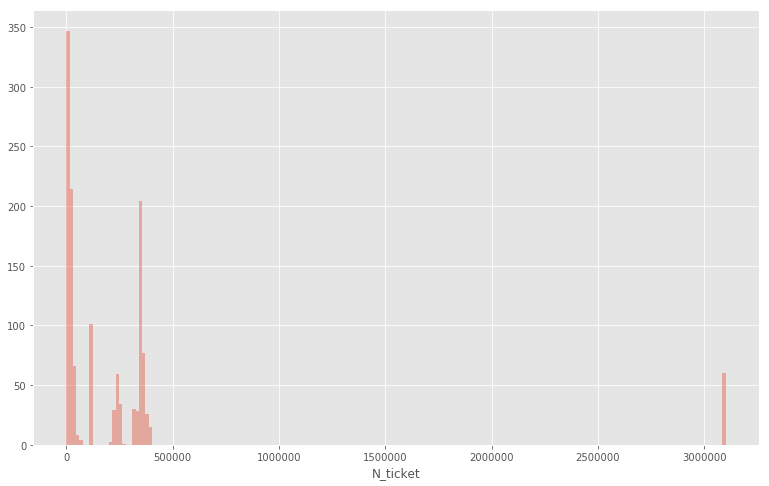

In [44]:
plt.figure( figsize=(13,8))
sns.distplot(data_all.N_ticket.dropna(),kde=False,bins=200)

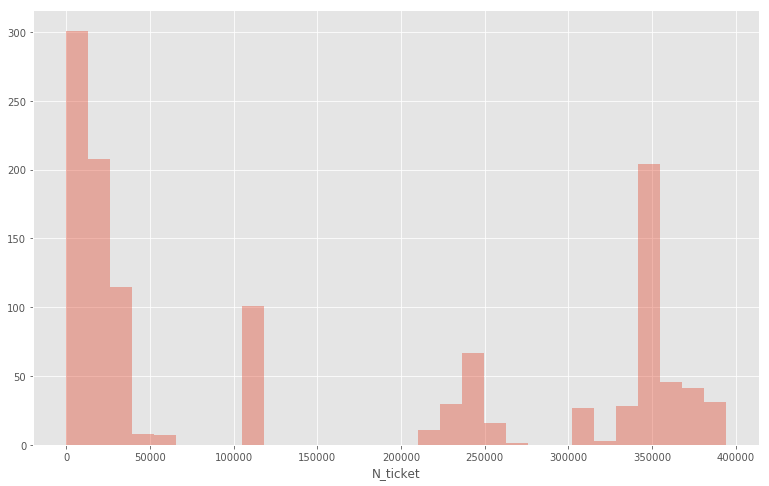

In [45]:
plt.figure( figsize=(13,8))
sns.distplot(data_all.N_ticket[data_all.N_ticket<3000000],kde=False,bins=30)

Five different categories of tickets are shown in the plots. Therefore the tickets are clissified.

In [46]:
def process_ticket_number():
    
    global data_all
    
    data_all['N_ticket']=data_all['Ticket'].str.split().apply(lambda i:int(i[-1]) if i[-1]!='LINE' else 30000000)
    
    def ticket_class(row):
        if row<100000:
            return 'A_ticket'
        elif row<200000:
            return 'B_ticket' 
        elif row<300000:
            return 'C_ticket'
        elif row<400000: 
            return 'D_ticket'
        else:
            return 'E_ticket'
    
    data_all['N_ticket_class']=data_all.N_ticket.apply(ticket_class)
    

In [47]:
process_ticket_number()

In [48]:
data_all.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,N_ticket,N_ticket_class
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,21171,A_ticket
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,17599,A_ticket
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,3101282,E_ticket
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,113803,B_ticket
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,373450,D_ticket


####  Analysis of the prefix

There are 39 different prefix for the ticket. 

In [49]:
data_all['Ref_ticket']=data_all['Ticket'].str.split().apply(lambda i:''.join(i[0:-1]).replace('.','').lower()) 

In [50]:
data_all.Ref_ticket.unique()

array(['a/5', 'pc', 'ston/o2', '', 'pp', 'ca', 'sc/paris', 'sc/a4', 'a/4',
       'sp', 'soc', 'so/c', 'w/c', 'soton/oq', 'wep', 'a4', 'c', 'sop',
       'a5', 'fa', 'fcc', 'sw/pp', 'sco/w', 'p/pp', 'sc', 'sc/ah', 'a/s',
       'sc/ahbasle', 'we/p', 'so/pp', 'fc', 'soton/o2', 'ca/soton',
       'sc/a3', 'ston/oq', 'aq/4', 'a2', 'lp', 'aq/3'], dtype=object)

In [51]:
data_all.Ref_ticket.nunique()

39

In order to reduce the number of classes, and correct possible typos ('we/p'-> 'wep', 'ston'-> 'soton'), the following corrections are made based on my suppositions.

In [52]:
data_all.groupby(['Pclass','Ref_ticket']).Pclass.count()

Pclass  Ref_ticket
1                     224
        fc              3
        pc             92
        we/p            2
        wep             2
2                     184
        ca             33
        ca/soton        1
        fcc             9
        p/pp            2
        sc              2
        sc/a3           1
        sc/ah           4
        sc/ahbasle      1
        sc/paris       19
        sco/w           1
        so/c            1
        so/pp           4
        soc             7
        sop             1
        sw/pp           2
        w/c             5
3                     553
        a/4             9
        a/5            25
        a/s             1
        a2              1
        a4              1
        a5              3
        aq/3            1
        aq/4            1
        c               8
        ca             35
        fa              1
        lp              1
        pp              4
        sc/a4           2
        so/pp      

In [53]:
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('ston', 'soton')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('so/c', 'soc')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('sop', 'soc')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('sco/w', 'soc')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('ca/soton', 'ca')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('we/p', 'wep')

data_all.Ref_ticket=data_all.Ref_ticket.str.replace('sc/ahbasle', 'sc')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('sc/a3', 'sc')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('sc/ah', 'sc')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('sc/paris', 'sc')

data_all.Ref_ticket=data_all.Ref_ticket.str.replace('aq', 'a')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('a/4', 'a4')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('a/3', 'a4')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('a/5', 'a5')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('a/s', 'a4')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('a2', 'a4')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('a3', 'a4')

data_all.Ref_ticket=data_all.Ref_ticket.str.replace('sc/a4', 'a4')

data_all.Ref_ticket=data_all.Ref_ticket.str.replace('p/pp', 'pp')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('so/pp', 'pp')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('sw/pp', 'pp')

data_all.Ref_ticket=data_all.Ref_ticket.str.replace('lp', 'fa')
data_all.Ref_ticket=data_all.Ref_ticket.str.replace('sp', 'fa')

In [54]:
data_all.groupby(['Ref_ticket']).Pclass.count()

Ref_ticket
            961
a4           16
a5           28
c             8
ca           69
fa            3
fc            3
fcc           9
pc           92
pp           15
sc           27
soc          10
soton/o2     24
soton/oq     25
w/c          15
wep           4
Name: Pclass, dtype: int64

The following table shows if our suppositions are well founded. Most of the most of the modified groups enter in just one class.


In [55]:
data_all.groupby(['Ref_ticket','Pclass']).Fare.describe()

count        mean         std      min        25%  \
Ref_ticket Pclass                                                      
           1       224.0   72.537204   56.546585   0.0000  30.000000   
           2       184.0   19.794995   11.269477   0.0000  13.000000   
           3       553.0   12.122950    8.730992   0.0000   7.750000   
a4         3        16.0   10.964581    6.545259   7.2500   7.987500   
a5         3        28.0    9.594046    3.190284   7.2500   7.970825   
c          3         8.0   12.354688    8.525640   3.1708   6.968775   
ca         2        34.0   19.926103    9.969075  10.5000  10.500000   
           3        35.0   39.754286   24.167287   7.5500  18.075000   
fa         3         3.0    7.681933    0.432921   7.3125   7.443750   
fc         1         3.0   43.247233   15.160237  25.7417  38.870850   
fcc        2         9.0   20.416667    6.125000  10.5000  21.000000   
pc         1        92.0  126.336726  113.567462  25.9250  47.028150   
pp         2         8.0   16.500000    6.513722  10.5000  10.500000   
           3         7.0   11.728571    4.693689   7.5500   7.550000   
sc         2        27.0   23.289663   11.227008  10.5000  13.858300   
soc        2        10.0   54.980000   29.824575  10.5000  27.768750   
soton/o2   3        24.0    8.452083    2.298427   7.1250   7.925000   
soton/oq   3        25.0    8.273000    2.121749   7.0500   7.050000   
w/c        2         5.0   10.500000    0.000000  10.5000  10.500000   
           3        10.0   27.322500    8.816812   7.5500  23.450000   
wep        1         4.0   66.087500    5.672466  61.1750  61.175000   

                        50%         75%       max  
Ref_ticket Pclass                                  
           1       55.22085   87.151050  263.0000  
           2       13.50000   26.000000   65.0000  
           3        7.89580   14.454200   56.4958  
a4         3        8.05000    8.050000   24.1500  
a5         3        8.05000    9.662500   16.1000  
c          3        7.25000   22.525000   22.5250  
ca         2       15.75000   27.750000   36.7500  
           3       46.90000   69.550000   69.5500  
fa         3        7.57500    7.866650    8.1583  
fc         1       52.00000   52.000000   52.0000  
fcc        2       21.00000   26.250000   26.2500  
pc         1       80.68540  170.541675  512.3292  
pp         2       15.75000   21.750000   24.0000  
           3        9.35000   16.700000   16.7000  
sc         2       15.57920   32.362500   41.5792  
soc        2       73.50000   73.500000   73.5000  
soton/o2   3        7.92500    7.925000   15.8500  
soton/oq   3        7.85000    8.050000   13.7750  
w/c        2       10.50000   10.500000   10.5000  
           3       28.91250   34.375000   34.3750  
wep        1       66.08750   71.000000   71.0000

In [56]:
data_all.Ref_ticket.nunique()


16

In [57]:
data_all.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,N_ticket,N_ticket_class,Ref_ticket
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,21171,A_ticket,a5
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,17599,A_ticket,pc
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,3101282,E_ticket,soton/o2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,113803,B_ticket,
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,373450,D_ticket,


### Processing the Sex

Set the categorical features for the sex 

In [58]:
def process_sex():
    
    global data_all
    # mapping string values to numerical one 
    data_all['Sex'] = data_all['Sex'].map({'male':1,'female':0})


In [59]:
process_sex()

In [60]:
data_all.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,N_ticket,N_ticket_class,Ref_ticket
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S,Mr,21171,A_ticket,a5
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,Mrs,17599,A_ticket,pc
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,3101282,E_ticket,soton/o2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,Mrs,113803,B_ticket,
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S,Mr,373450,D_ticket,


### Creating family groups

A new feature is created in order to know the size of the family aboard of each passenger

In [61]:
def process_family():
    
    global data_all
    # introducing a new feature : the size of families (including the passenger)
    data_all['FamilySize'] = data_all['Parch'] + data_all['SibSp'] + 1
    
    # introducing other features based on the family size
    data_all['Single'] = data_all['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    data_all['SmallFamily'] = data_all['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    data_all['LargeFamily'] = data_all['FamilySize'].map(lambda s: 1 if 5<=s else 0)

In [62]:
process_family()

In [63]:
data_all.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,N_ticket,N_ticket_class,Ref_ticket,FamilySize,Single,SmallFamily,LargeFamily
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S,Mr,21171,A_ticket,a5,2,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,Mrs,17599,A_ticket,pc,2,0,1,0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,3101282,E_ticket,soton/o2,1,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,Mrs,113803,B_ticket,,2,0,1,0
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S,Mr,373450,D_ticket,,1,1,0,0


## Converting Categorical Features 

Convert categorical features to dummy variables using pandas.

In [64]:
def Categorical_Features():
    
    global data_all
    # encoding categories:
    # N_ticket_class
    temp = pd.get_dummies(data_all['N_ticket_class'], prefix="N_ticket_class")
    data_all = pd.concat([data_all,temp],axis=1)
    data_all.drop('N_ticket_class',axis=1,inplace=True)
    
    # Ref_ticket
    temp = pd.get_dummies(data_all['Ref_ticket'], prefix="Ref_ticket")
    data_all = pd.concat([data_all,temp],axis=1)
    data_all.drop('Ref_ticket',axis=1,inplace=True)

    # Cabin
    temp = pd.get_dummies(data_all['Cabin'], prefix="Cabin")
    data_all = pd.concat([data_all,temp],axis=1)
    data_all.drop('Cabin',axis=1,inplace=True)
    
    # Embarked
    temp = pd.get_dummies(data_all['Embarked'], prefix="Embarked")
    data_all = pd.concat([data_all,temp],axis=1)
    data_all.drop('Embarked',axis=1,inplace=True)
    
    # title
    temp = pd.get_dummies(data_all['title'], prefix="title")
    data_all = pd.concat([data_all,temp],axis=1)
    data_all.drop('title',axis=1,inplace=True)
    
    data_all.drop('Ticket',axis=1,inplace=True)
    data_all.drop('Name',axis=1,inplace=True)

In [65]:
Categorical_Features()

In [66]:
data_all.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,N_ticket,FamilySize,Single,SmallFamily,LargeFamily,N_ticket_class_A_ticket,N_ticket_class_B_ticket,N_ticket_class_C_ticket,N_ticket_class_D_ticket,N_ticket_class_E_ticket,Ref_ticket_,Ref_ticket_a4,Ref_ticket_a5,Ref_ticket_c,Ref_ticket_ca,Ref_ticket_fa,Ref_ticket_fc,Ref_ticket_fcc,Ref_ticket_pc,Ref_ticket_pp,Ref_ticket_sc,Ref_ticket_soc,Ref_ticket_soton/o2,Ref_ticket_soton/oq,Ref_ticket_w/c,Ref_ticket_wep,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,title_Dr,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Rev,title_Royalty
0,1,3,1,22.0,1,0,7.2500,21171,2,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,2,1,0,38.0,1,0,71.2833,17599,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,3,0,26.0,0,0,7.9250,3101282,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,4,1,0,35.0,1,0,53.1000,113803,2,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,5,3,1,35.0,0,0,8.0500,373450,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [67]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 53 columns):
PassengerId                1309 non-null int64
Pclass                     1309 non-null int64
Sex                        1309 non-null int64
Age                        1309 non-null float64
SibSp                      1309 non-null int64
Parch                      1309 non-null int64
Fare                       1309 non-null float64
N_ticket                   1309 non-null int64
FamilySize                 1309 non-null int64
Single                     1309 non-null int64
SmallFamily                1309 non-null int64
LargeFamily                1309 non-null int64
N_ticket_class_A_ticket    1309 non-null uint8
N_ticket_class_B_ticket    1309 non-null uint8
N_ticket_class_C_ticket    1309 non-null uint8
N_ticket_class_D_ticket    1309 non-null uint8
N_ticket_class_E_ticket    1309 non-null uint8
Ref_ticket_                1309 non-null uint8
Ref_ticket_a4              1309 non-null ui

In [68]:
data_all.shape

(1309, 53)

# Building a test bench
First many classifiers are tested in order to find the most suitable one.

Load data

In [69]:
def recover_train_test_target():
    global data_all
    
    train0 = pd.read_csv('train.csv')
    
    targets = train0.Survived
    train = data_all.head(891)
    test = data_all.iloc[891:]
    
    return train, test, targets

In [70]:
train, test, targets = recover_train_test_target()

Split data in train and test for training

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(train, targets, test_size=0.25, random_state=101)

### Find the best classifyer

In [73]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.model_selection import train_test_split


Grid for the SVC

In [74]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01, 0.005, 0.001, 0.0001], 'kernel': ['rbf']} 

Function that will test the list of classifiers

In [75]:
def benchmark(clf):
    """
    Takes in a tuple with a classifier function and the name of the classifier then performs the following:
    1. Runs the classifier with the train data
    2. Makes the prediction with the fitted model and the test data
    3. Calculates the F1 score 
    4. Print the Classification report for the model
    5. Returns the name of the classifier and the f1 score
    """
    print('_' * 80)
    print("Training: ")
    print(clf)

    # fit the model
    clf.fit(X_train, y_train)
    # predict the type of job offer with the model
    pred = clf.predict(X_test)
    # calculates the F1 score 
    score = metrics.f1_score(y_test, pred)

    print("Classification report:")
    print(metrics.classification_report(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr,score

List of classifiers

In [76]:
classifiers=(
        # Generalized Linear Models
            ## RidgeClassifier: Ordinary Least Squares by imposing a penalty on the size of coefficients
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
            ## Perceptron: Simple algorithm suitable for large scale learning. By default:
                # It does not require a learning rate.
                # It is not regularized (penalized).
                # It updates its model only on mistakes.
        (Perceptron(max_iter=50), "Perceptron"),
            ## PassiveAggressiveClassifier: algorithm for large-scale learning.
                # Similar to the Perceptron (do not require a learning rate). Include a regularization parameter.
        (PassiveAggressiveClassifier(max_iter=50), "Passive-Aggressive"),
            ## SGDClassifier:
                #This estimator implements regularized linear models with stochastic gradient descent (SGD) learning

        (SGDClassifier(alpha=.0001, max_iter=50,penalty='l1'),"SGDClassifier p=l1"),
        (SGDClassifier(alpha=.0001, max_iter=50,penalty='l2'),"SGDClassifier p=l2"),
        (SGDClassifier(alpha=.0001, max_iter=50,penalty="elasticnet"),"SGDClassifier p=elasticnet"),
        # Nearest Neighbors:
           ## KNeighborsClassifierB
               # Find a predefined number of training samples closest in distance
        (KNeighborsClassifier(n_neighbors=3), "kNN"),
            ## NearestCentroid:
                # Nearest centroid classifier
        (NearestCentroid(),"NearestCentroid"),
        #Ensemble Methods
            ## RandomForestClassifier
        (RandomForestClassifier(n_estimators=5), "Random forest 1"),
        (RandomForestClassifier(n_estimators=100,max_leaf_nodes=12,max_depth=12,random_state=0),"Random forest 1"),
        (RandomForestClassifier(n_estimators=50, max_features='sqrt'),"Random forest 1"),
        (AdaBoostClassifier(),"AdaBoostClassifier"),
        # Support Vector Machines
        (GridSearchCV(SVC(),param_grid,refit=True,verbose=0),"Support Vector Machines"),
            ## LinearSVC : Linear Support Vector Classification
        (LinearSVC(penalty='l1', dual=False,tol=1e-3),"LinearSVC p=l1"),
        (LinearSVC(penalty='l2', dual=False,tol=1e-3),"LinearSVC p=l2"),
        # Naive Bayes
            ## MultinomialNB:
                #The multinomial Naive Bayes classifier is suitable for classification with discrete features 
                #(e.g., word counts for text classification)
        (MultinomialNB(alpha=.01),"MultinomialNB"),
            ## BernoulliNB:
                # Like MultinomialNB, this classifier is suitable for discrete data.
        (BernoulliNB(alpha=.01),"BernoulliNB"),
        (GaussianNB(),"GaussianNB"),
        # Gaussian Processes 
        #(GaussianProcessClassifier(1.0 * RBF(1.0)),"GaussianProcessClassifier"),
        # Tree
        (DecisionTreeClassifier(max_depth=5),"DecisionTreeClassifier"),
        # neural_network
        (MLPClassifier(),"neural_network"),
        # discriminant_analysis
        (QuadraticDiscriminantAnalysis(),"discriminant_analysis")
)

## Training

The list of classifiers is train and the results are shown.

In [77]:
results = []
for clf, name in classifiers:
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
Classification report:
             precision    recall  f1-score   support

          0       0.57      1.00      0.73       127
          1       0.00      0.00      0.00        96

avg / total       0.32      0.57      0.41       223


Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=50, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)
Classification report:
             precision    recall  f1-score   support

          0       0.57      1.00      0.73       127
          1       0.00      0.00      0.00 

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files\Anaconda3\lib\site-pa

Classification report:
             precision    recall  f1-score   support

          0       0.77      0.90      0.83       127
          1       0.83      0.65      0.73        96

avg / total       0.79      0.79      0.78       223


Random forest 1
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Classification report:
             precision    recall  f1-score   support

          0       0.77      0.91      0.83       127
          1       0.84      0.64      0.72        96

avg / total       0.80      0.79      0.78      

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [78]:
results

[('RidgeClassifier', 0.0),
 ('Perceptron', 0.0),
 ('PassiveAggressiveClassifier', 0.57999999999999996),
 ('SGDClassifier', 0.60188087774294674),
 ('SGDClassifier', 0.0),
 ('SGDClassifier', 0.0),
 ('KNeighborsClassifier', 0.52325581395348841),
 ('NearestCentroid', 0.61437908496732019),
 ('RandomForestClassifier', 0.69822485207100593),
 ('RandomForestClassifier', 0.72514619883040943),
 ('RandomForestClassifier', 0.72189349112426027),
 ('AdaBoostClassifier', 0.72043010752688186),
 ('GridSearchCV', 0.35114503816793891),
 ('LinearSVC', 0.72222222222222221),
 ('LinearSVC', 0.0),
 ('MultinomialNB', 0.5877862595419846),
 ('BernoulliNB', 0.71038251366120231),
 ('GaussianNB', 0.16666666666666666),
 ('DecisionTreeClassifier', 0.71428571428571419),
 ('MLPClassifier', 0.48520710059171601),
 ('QuadraticDiscriminantAnalysis', 0.60983606557377046)]

The best classifier is random forest. Therefore the algorithm is tested with different parameters.

In [79]:
# turn run_gs to True if you want to run the gridsearch again.
run_grid_search = False

if run_grid_search:
    parameter_grid = {
                 'max_depth' : [3,5,6,7,9],
                 'n_estimators': [70,60,50,40,30],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [8,9,10,11,12],
                 'min_samples_leaf': [1,2,3,4,5],
                 'bootstrap': [True, False],
                 }

    model = GridSearchCV(RandomForestClassifier(),scoring='accuracy',param_grid=parameter_grid,verbose=1)
    model.fit(X_train, y_train)
    
    parameters = model.best_params_
    print(metrics.classification_report(y_test, model.predict(X_test)))
    print('Best parameters: {}'.format(model.best_params_))
else: 
    
    parameters = {'bootstrap': True, 'max_depth': 6, 'max_features': 'auto', 
                  'min_samples_leaf': 5, 'min_samples_split': 9, 'n_estimators': 30}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

    print(metrics.classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.80      0.93      0.86       127
          1       0.88      0.70      0.78        96

avg / total       0.84      0.83      0.83       223



The importance of each feature for the trained model

In [80]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

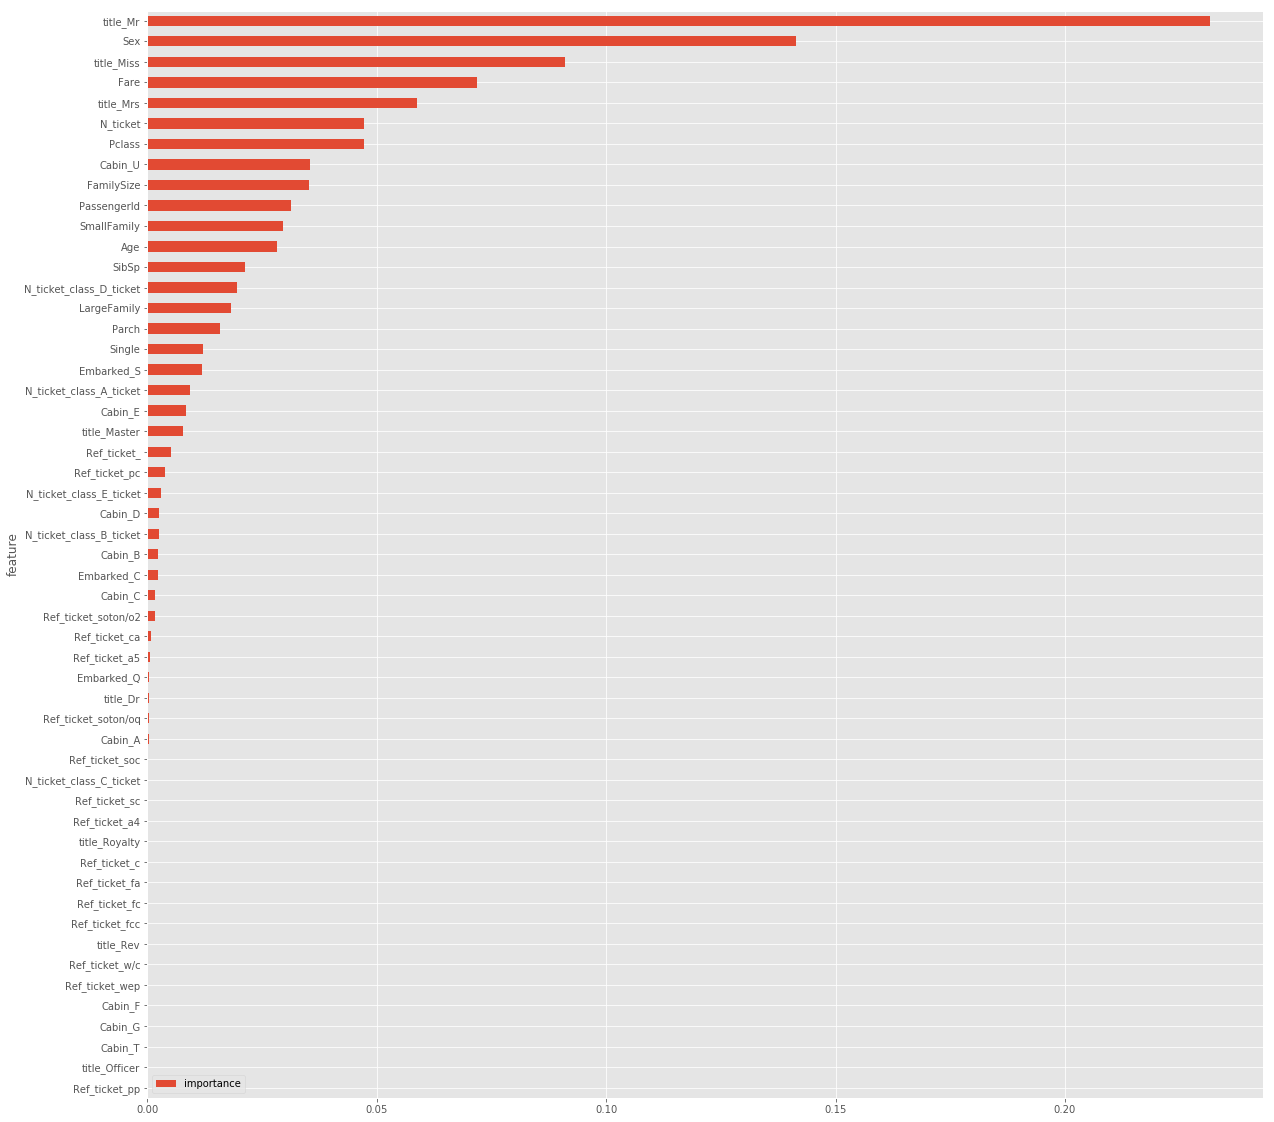

In [81]:
features.plot(kind='barh', figsize=(20, 20))

Generate an output file to submit on Kaggle

In [82]:
#Submission
test2 = pd.read_csv('test.csv')
#We create a new dataframe for the submission
results_titanic = pd.DataFrame()

results_titanic["PassengerId"] = test["PassengerId"]
results_titanic["Survived"] = model.predict(test)

#We save the submission as a '.csv' file
results_titanic.to_csv("results_titanic.csv", index=False)

This solution allowed me to get an accuracy score of 0.77511 on the public leaderboard.